<a href="https://colab.research.google.com/github/James0972/API/blob/main/unleashed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay


In [2]:
df=pd.read_csv('last.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.describe(include='object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


PLOTTING DISTRIBUTION RELATIONSHIP


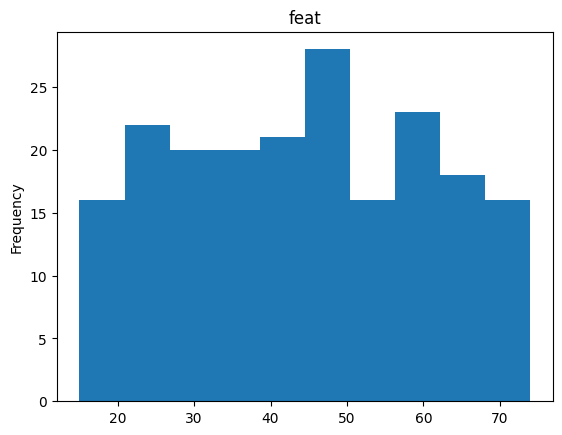

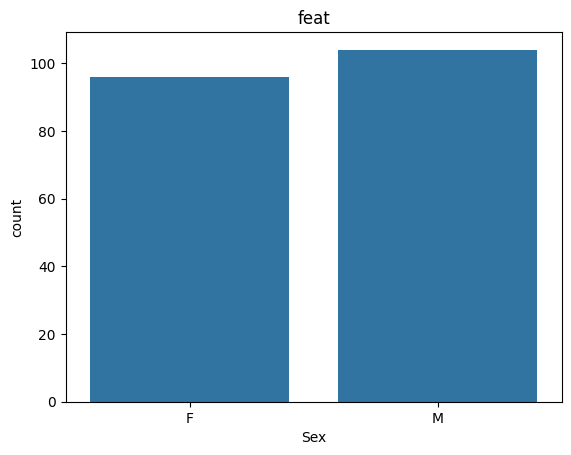

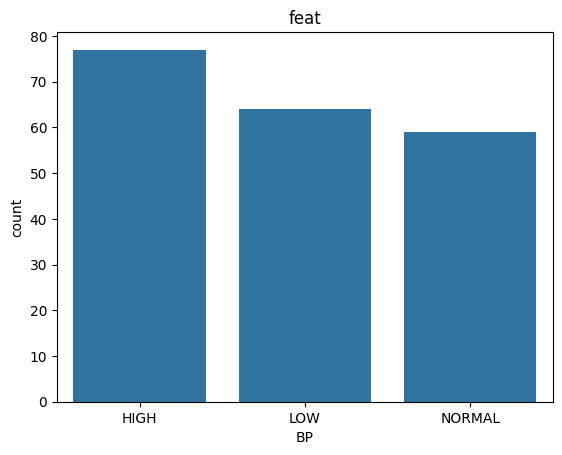

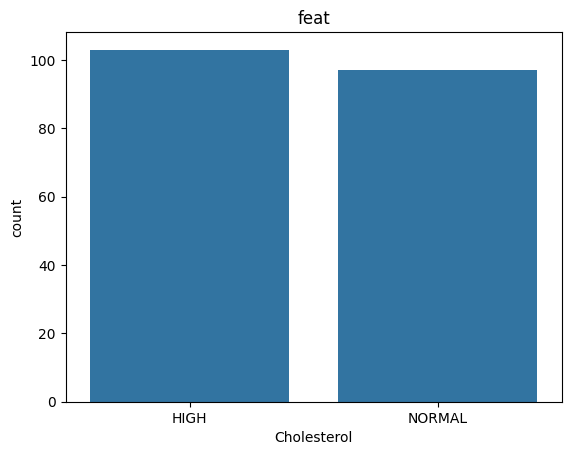

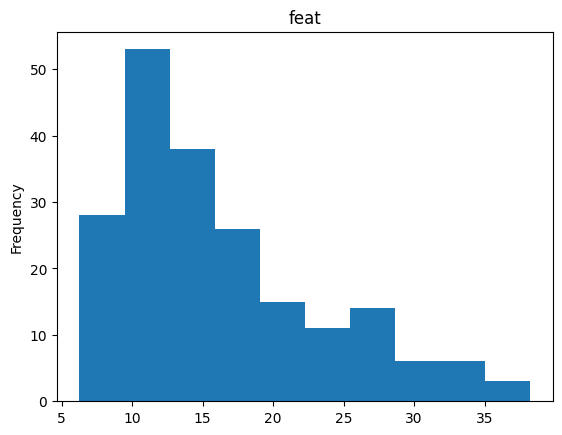

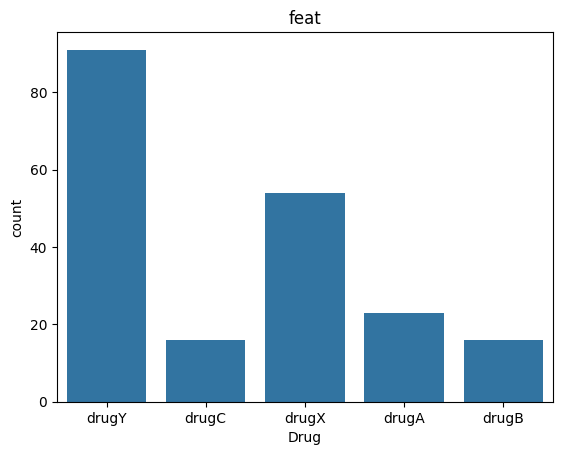

In [6]:
for feat in df.columns:
  if(df[feat].dtype=='int') or (df[feat].dtype=='float'):
    df[feat].plot(kind='hist')
    plt.title('feat')
    plt.show()
  else:
    sns.countplot(data=df,x=feat)
    plt.title('feat')
    plt.show()


PLOTTING BIVARIATE RELATIONSHIP

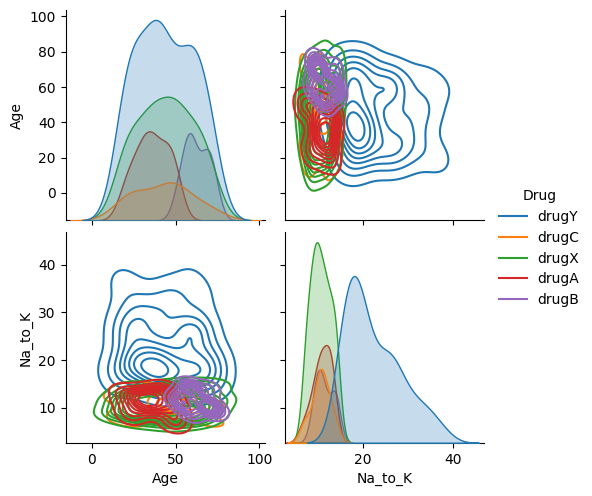

In [7]:
sns.pairplot(data=df, hue='Drug', kind='kde')

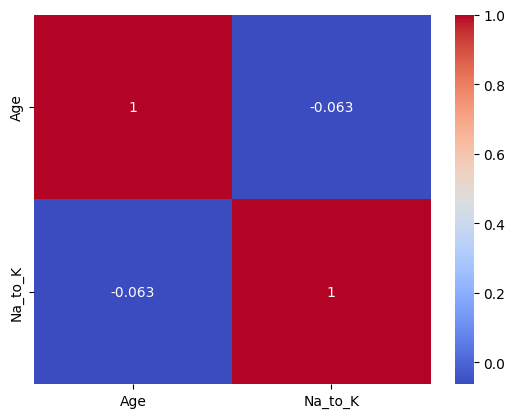

In [8]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le_Sex=LabelEncoder()
le_BP=LabelEncoder()
le_Cholesterol=LabelEncoder()
le_Drug=LabelEncoder()

In [10]:
df['Sex_num'] = le_Sex.fit_transform(df['Sex'])
df['BP_num'] = le_BP.fit_transform(df['BP'])
df['Cholesterol_num'] = le_Cholesterol.fit_transform(df['Cholesterol'])
df['Drug_num'] = le_Drug.fit_transform(df['Drug'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_num,BP_num,Cholesterol_num,Drug_num
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


In [11]:
df1= df.drop(['Sex','BP','Cholesterol','Drug'],axis='columns')

In [12]:
df1.head()

,Age,Na_to_K,Sex_num,BP_num,Cholesterol_num,Drug_num
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


<Axes: >

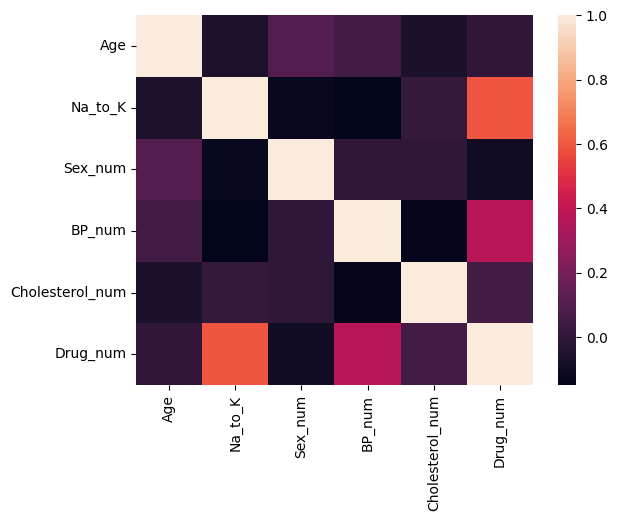

In [13]:
sns.heatmap(df1.corr())

In [14]:
numerical_df = df.select_dtypes(include=np.number)
correlation_with_drug = numerical_df.corrwith(df['Drug_num'])
print(correlation_with_drug)

Age               -0.004828
Na_to_K            0.589120
Sex_num           -0.098573
BP_num             0.372868
Cholesterol_num    0.055629
Drug_num           1.000000
dtype: float64


BUILDING AND TRAINING THE MODEL


In [15]:
df1.columns

Index(['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num', 'Drug_num'], dtype='object')

In [16]:
X = df1[['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num']]
y = df1['Drug_num']



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

In [18]:
unpruned=DecisionTreeClassifier()
unpruned.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
score_upruned_train=unpruned.score(X_train,y_train)
score_upruned_test=unpruned.score(X_test,y_test)



In [20]:
train_score=[score_upruned_train]
test_score=[score_upruned_test]
model_list=['unpruned']
score_dict={'model':model_list,'train_score':train_score,'test_score':test_score}
score_df=pd.DataFrame(score_dict)
score_df

,model,train_score,test_score
0,unpruned,1.0,1.0


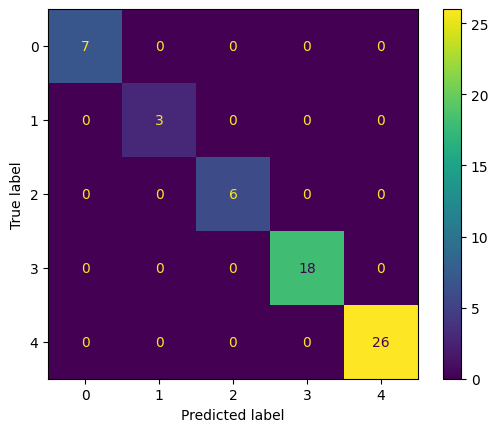

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [21]:
y_pred = unpruned.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Print accuracy scores
print(f"Training Accuracy: {score_upruned_train}")
print(f"Testing Accuracy: {score_upruned_test}")

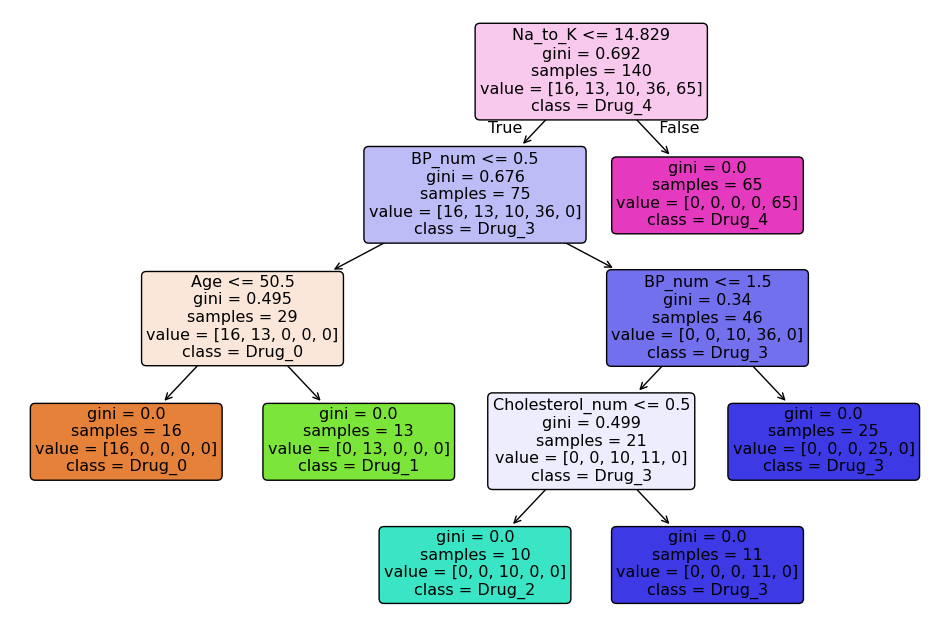

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(unpruned,
          feature_names=['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num'],
          class_names=['Drug_0', 'Drug_1', 'Drug_2', 'Drug_3', 'Drug_4'],  # Replace with your actual class names
          filled=True,
          rounded=True)
plt.show()

In [23]:
n_para= DecisionTreeClassifier(max_depth= 6, min_samples_split= 10, min_samples_leaf= 10,  max_features=0.6).fit(X_train, y_train)

In [24]:
score_n_para_train=n_para.score(X_train,y_train)
score_n_para_test=n_para.score(X_test,y_test)

In [25]:
train_score=[score_upruned_train, score_n_para_train]
test_score=[score_upruned_test, score_n_para_test]
model_list=['unpruned', 'n_para']
score_dict={'model':model_list,'train_score':train_score,'test_score':test_score}
score_df=pd.DataFrame(score_dict, index=model_list)
score_df

,model,train_score,test_score
unpruned,unpruned,1.000000,1.0
n_para,n_para,0.985714,1.0


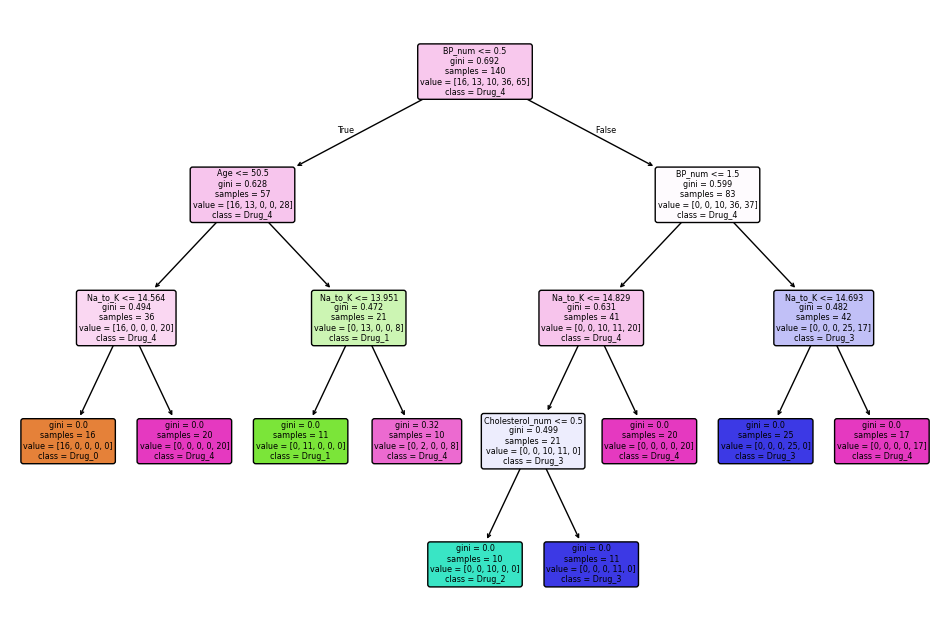

In [26]:
plt.figure(figsize=(12, 8))
plot_tree(n_para,
          feature_names=['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num'],
          class_names=['Drug_0', 'Drug_1', 'Drug_2', 'Drug_3', 'Drug_4'],  # Replace with your actual class names
          filled=True,
          rounded=True)
plt.show()

In [27]:
post_para= DecisionTreeClassifier(max_depth= 10, min_samples_split= 10, min_samples_leaf= 10,  max_features=0.8).fit(X_train, y_train)

In [28]:
score_post_para_train=post_para.score(X_train,y_train)
score_post_para_test=post_para.score(X_test,y_test)

In [29]:
train_score=[score_upruned_train, score_n_para_train, score_post_para_train]
test_score=[score_upruned_test, score_n_para_test, score_post_para_test]
model_list=['unpruned', 'n_para', 'post_para']
score_dict={'model':model_list,'train_score':train_score,'test_score':test_score}
score_df=pd.DataFrame(score_dict, index=model_list)
score_df

,model,train_score,test_score
unpruned,unpruned,1.000000,1.0
n_para,n_para,0.985714,1.0
post_para,post_para,1.000000,1.0


In [30]:
path=post_para.cost_complexity_pruning_path(X_train, y_train)
path=pd.DataFrame(path)
path

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.055901,0.111801
2,0.102463,0.214264
3,0.148021,0.362286
4,0.329245,0.691531


<Axes: xlabel='ccp_alphas'>

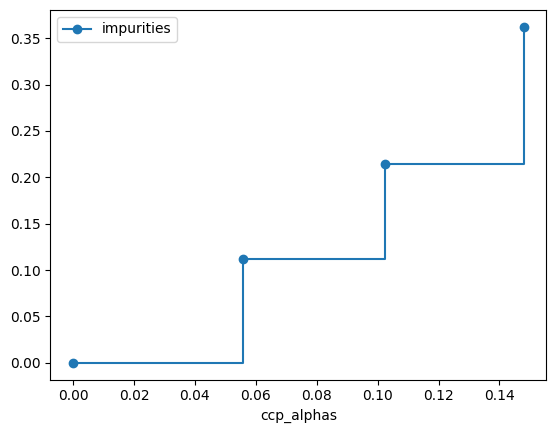

In [31]:
path[:-1].plot(x='ccp_alphas', y='impurities', marker='o', drawstyle='steps-post')


In [32]:
trees=[]
for cc_alphas in path['ccp_alphas']:
    tree=DecisionTreeClassifier(max_depth= 10, min_samples_split= 15, min_samples_leaf= 15,  max_features=0.8, ccp_alpha=cc_alphas).fit(X_train, y_train) # Use cc_alphas instead of ccp_alpha
    trees.append(tree) # Append the tree, not the trees list itself
    print('numbers of nodes in the last tree is : ({}) with cc_alphas:({})'.format(trees[-1].tree_.node_count, cc_alphas)) # Fix the string formatting

numbers of nodes in the last tree is : (9) with cc_alphas:(0.0)
numbers of nodes in the last tree is : (5) with cc_alphas:(0.05590062111801243)
numbers of nodes in the last tree is : (3) with cc_alphas:(0.10246305418719212)
numbers of nodes in the last tree is : (5) with cc_alphas:(0.14802141786249728)
numbers of nodes in the last tree is : (1) with cc_alphas:(0.3292448979591837)


<Axes: xlabel='ccp_alphas'>

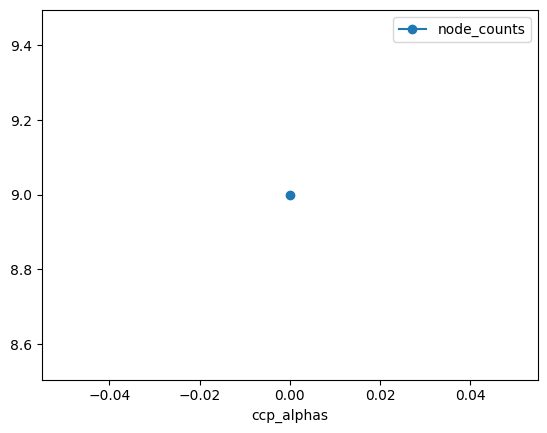

In [33]:
node_counts=[tree.tree_.node_count for tree in trees]
depth=[tree.tree_.max_depth for tree in trees]
path['node_counts'],path['depth']=node_counts, depth
path[:1].plot(x='ccp_alphas', y='node_counts', marker='o', drawstyle='steps-post')


<Axes: xlabel='ccp_alphas'>

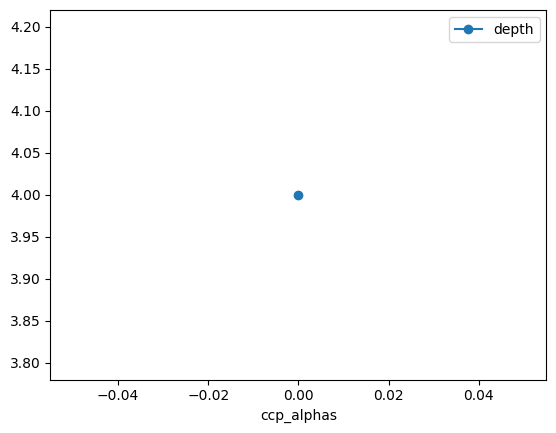

In [34]:
path[:1].plot(x='ccp_alphas', y='depth', marker='o', drawstyle='steps-post')


In [35]:
last= DecisionTreeClassifier(max_depth= 10, min_samples_split= 10, min_samples_leaf= 10,  max_features=0.8, ccp_alpha=0.00).fit(X_train, y_train)

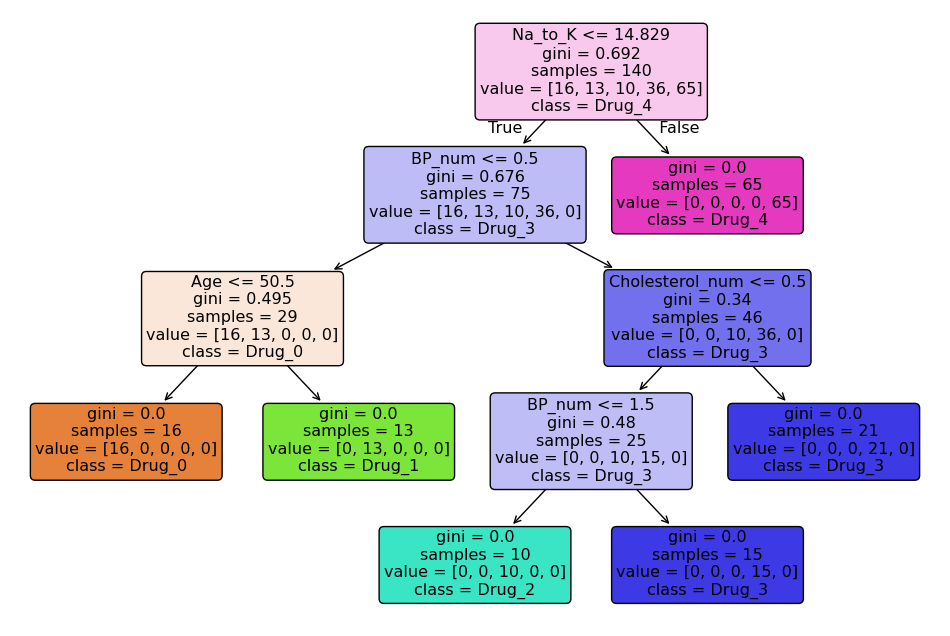

In [36]:
plt.figure(figsize=(12, 8))
plot_tree(last,
          feature_names=['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num'],
          class_names=['Drug_0', 'Drug_1', 'Drug_2', 'Drug_3', 'Drug_4'],  # Replace with your actual class names
          filled=True,
          rounded=True)
plt.show()

In [37]:
score_last_train=last.score(X_train,y_train)
score_last_test=last.score(X_test,y_test)

In [38]:
train_score=[score_upruned_train, score_n_para_train, score_post_para_train, score_last_train]
test_score=[score_upruned_test, score_n_para_test, score_post_para_test, score_last_test]
model_list=['unpruned', 'n_para', 'post_para', 'last']
score_dict={'model':model_list,'train_score':train_score,'test_score':test_score}
score_df=pd.DataFrame(score_dict, index=model_list)
score_df

,model,train_score,test_score
unpruned,unpruned,1.000000,1.0
n_para,n_para,0.985714,1.0
post_para,post_para,1.000000,1.0
last,last,1.000000,1.0


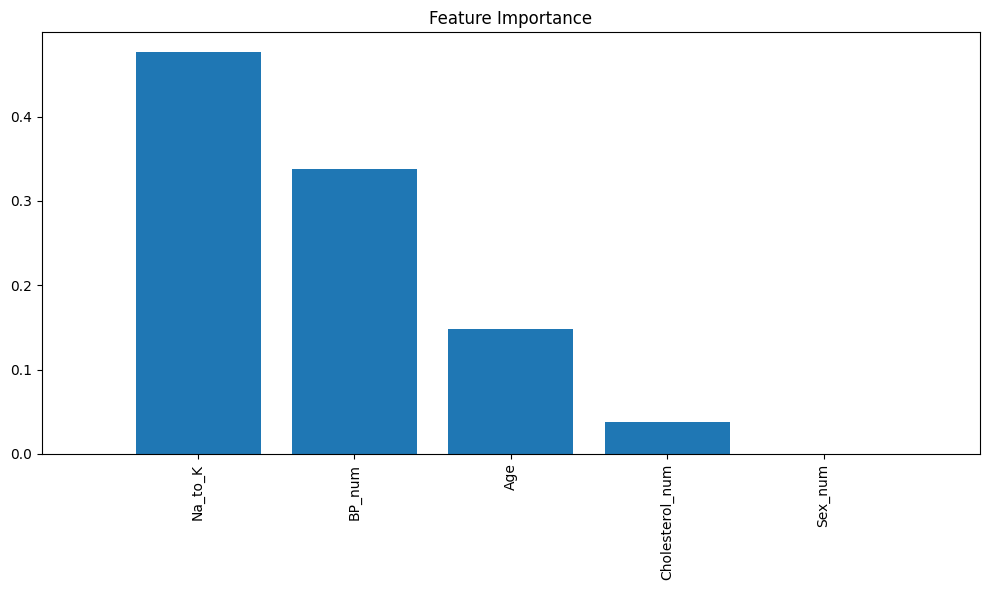

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'last' is your trained DecisionTreeClassifier
feature_importances = last.feature_importances_
feature_names = ['Age', 'Na_to_K', 'Sex_num', 'BP_num', 'Cholesterol_num']

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()